In [5]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
import pandas as pd
import plotly.express as px

# Load the dataset and filter for Adelie species
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
adelie_penguins = penguins[penguins['species'] == 'Adelie'].dropna(subset=['flipper_length_mm'])

# Compute statistics
mean_flipper = adelie_penguins['flipper_length_mm'].mean()
median_flipper = adelie_penguins['flipper_length_mm'].median()
min_flipper = adelie_penguins['flipper_length_mm'].min()
max_flipper = adelie_penguins['flipper_length_mm'].max()
std_flipper = adelie_penguins['flipper_length_mm'].std()
q1_flipper = adelie_penguins['flipper_length_mm'].quantile(0.25)
q3_flipper = adelie_penguins['flipper_length_mm'].quantile(0.75)
mean_minus_2std = mean_flipper - 2 * std_flipper
mean_plus_2std = mean_flipper + 2 * std_flipper

# Create histogram
fig = px.histogram(
    adelie_penguins,
    x='flipper_length_mm',
    nbins=30,
    title='Flipper Length Distribution - Adelie Penguins',
    labels={'flipper_length_mm': 'Flipper Length (mm)'},
    template='plotly_white'
)

# Add statistical markers
# Mean
fig.add_vline(
    x=mean_flipper,
    line_dash='dash',
    line_color='red',
    annotation_text='Mean',
    annotation_position='top left'
)
# Median
fig.add_vline(
    x=median_flipper,
    line_dash='dash',
    line_color='green',
    annotation_text='Median',
    annotation_position='top right'
)
# Range
fig.add_vrect(
    x0=min_flipper,
    x1=max_flipper,
    fillcolor='blue',
    opacity=0.1,
    line_width=0
)
# Interquartile Range
fig.add_vrect(
    x0=q1_flipper,
    x1=q3_flipper,
    fillcolor='orange',
    opacity=0.2,
    line_width=0
)
# Mean ± 2 Standard Deviations
fig.add_vrect(
    x0=mean_minus_2std,
    x1=mean_plus_2std,
    fillcolor='purple',
    opacity=0.1,
    line_width=0
)

# Show the plot
fig.show()


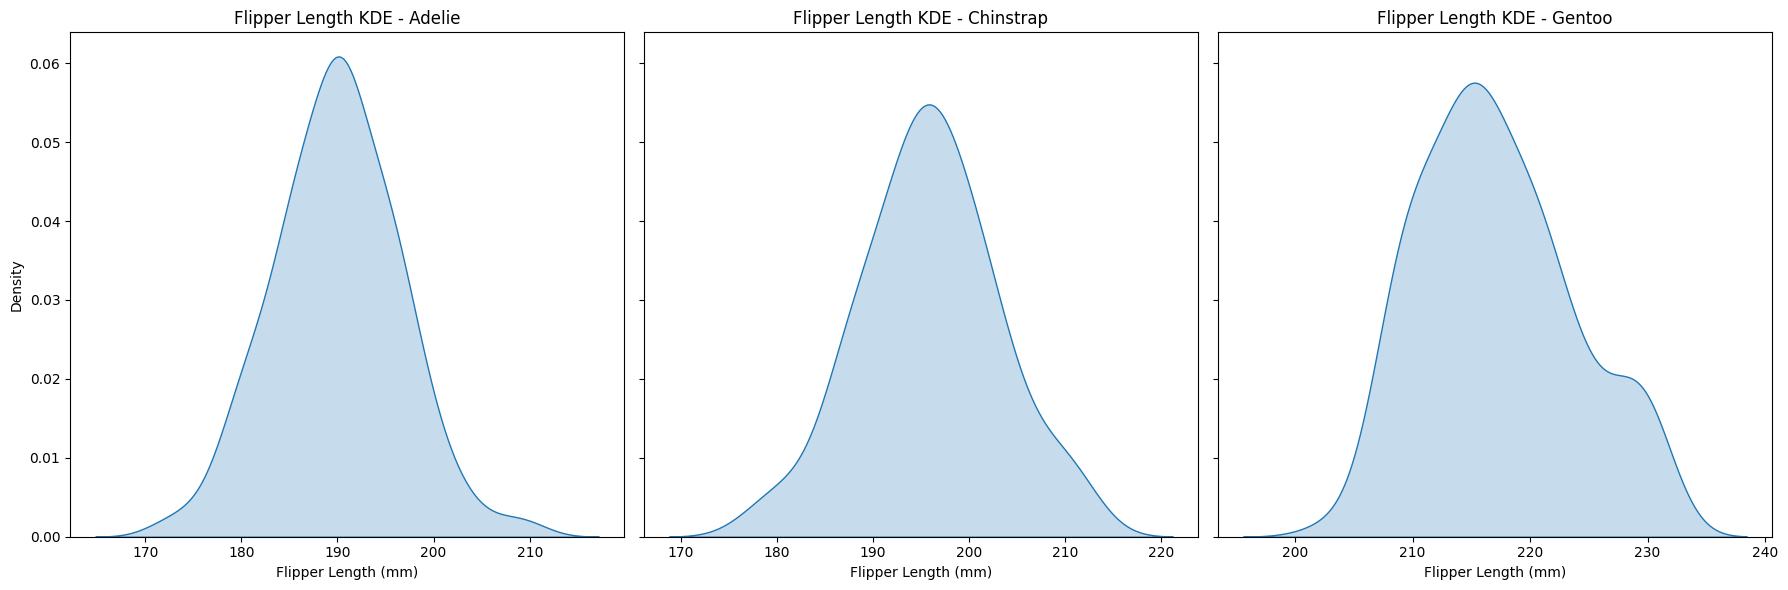

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop missing values in 'flipper_length_mm' and 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Set up the matplotlib figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of species
species_list = penguins['species'].unique()

# Iterate over species and create KDE plots
for ax, species in zip(axes, species_list):
    sns.kdeplot(
        data=penguins[penguins['species'] == species],
        x='flipper_length_mm',
        fill=True,
        common_norm=False,
        ax=ax
    )
    ax.set_title(f'Flipper Length KDE - {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


3) 

Me - "I think the main distinctions between box plots, histograms and KDEs are whether data is presented in a discrete or continuous fashion, as well as which data points are presented. While box plots prioritize presenting the minima, maxima and quartile and median values exactly, KDEs and Histograms focus on presenting the data as whole, and if you tried to derive any specific data points from them exactly you'd arrive at poorer estimates. What do you think the pros and cons of each of these methods of summarizing distribution are?"

ChatGPT - "Each visualization method—box plots, histograms, and KDE plots—offers unique advantages and limitations:

Box Plots excel at summarizing key statistical values and identifying outliers but lack detailed distribution shape information.
Histograms provide a visual representation of data frequency and distribution shape but can be sensitive to binning choices and may obscure specific data points.
KDE Plots offer a smooth and detailed view of the data distribution, revealing patterns that histograms might miss, but require careful bandwidth selection and may be less intuitive. ..."


In [1]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


1) **A&C** have the same mean and somewhat close variances but vastly different distributions
2) **A&B** have the same mean but very different variances
3) **B&D** have somewhat similar variances and slightly different means
4) **A&D** have both different means and variances


In [7]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

5) 
The mean is an estimation of average of a set of data that is sensitive to influence by outliers
The median is the most central data point in a set that can be used as an average for the data. It is not sensitive to outliers

A right-skew means that the mean is higher than the median. This suggests that data points tend to be more extreme at values higher than the median than those lower than the median

A left-skew means that the mean is lower than the median. This suggests that data points tend to be more extreme at values lower than the median than those higher than the median


6) 
I plotted the dialogue line lengths of hamlet characters and worked extensively with chatGPT to present the data reasonably.
While the original data set included every single line of dialogue, I decided to limit my chart to the 6 characters with the most lines. I left in "stage direction" as a charcter because it along with its distribution were funny.

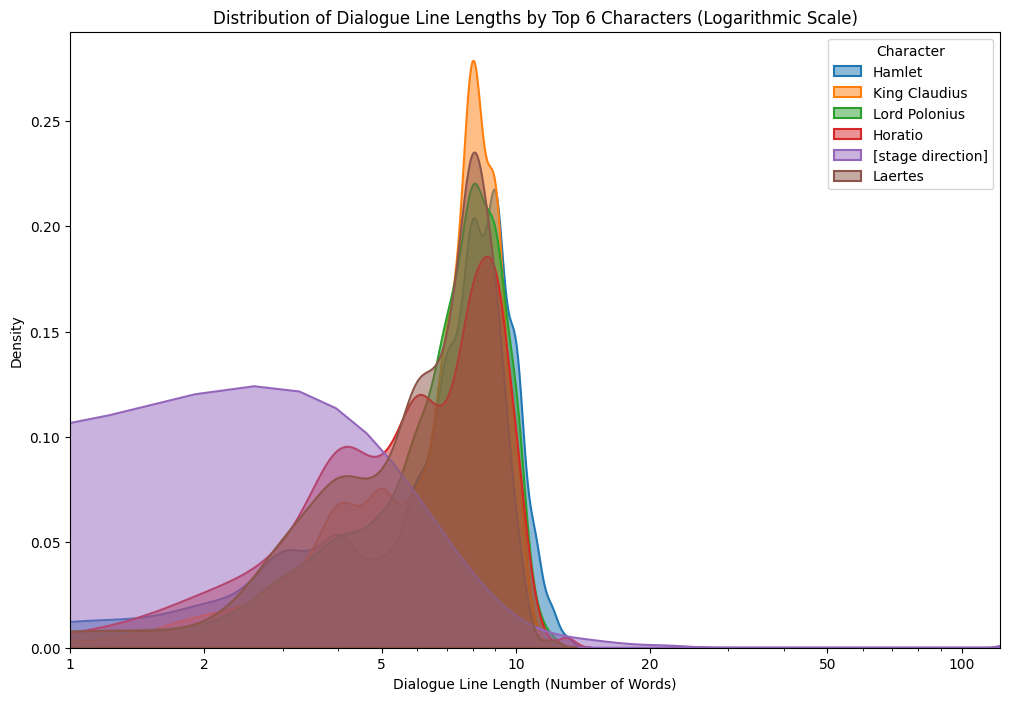

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/d49eddefd10b1909aa560b9cde15b12179e370ed/data/2024/2024-09-17/hamlet.csv'
df = pd.read_csv(url)

# Drop any rows with missing 'dialogue' or 'character'
df = df.dropna(subset=['dialogue', 'character'])

# Compute line lengths (number of words) for each dialogue
df['LineLength'] = df['dialogue'].apply(lambda x: len(str(x).split()))

# Ensure LineLength is at least 1
df = df[df['LineLength'] >= 1]

# Select the 6 characters with the most lines
line_counts = df['character'].value_counts()
top_characters = line_counts.nlargest(6).index.tolist()
df_top = df[df['character'].isin(top_characters)]

# Set up the color palette
palette = sns.color_palette('tab10', n_colors=len(top_characters))

# Create a mapping of characters to colors
character_colors = dict(zip(top_characters, palette))

# Plot KDE plots of dialogue line lengths by character
plt.figure(figsize=(12, 8))

for character in top_characters:
    subset = df_top[df_top['character'] == character]
    sns.kdeplot(
        data=subset,
        x='LineLength',
        fill=True,
        common_norm=False,
        alpha=0.5,
        linewidth=1.5,
        color=character_colors[character],
        label=character,
        bw_adjust=0.8,  # Adjust bandwidth if necessary
    )

# Set x-axis to logarithmic scale starting at 1
plt.xscale('log')
plt.xlim(1, df['LineLength'].max())

# Adjust x-axis ticks for better readability
from matplotlib.ticker import ScalarFormatter, LogLocator

ax = plt.gca()
ax.xaxis.set_major_locator(LogLocator(base=10, subs=(1,2,5)))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='x', which='major', labelsize=10)

plt.title('Distribution of Dialogue Line Lengths by Top 6 Characters (Logarithmic Scale)')
plt.xlabel('Dialogue Line Length (Number of Words)')
plt.ylabel('Density')
plt.legend(title='Character', loc='upper right')
plt.show()


**Chat GPT Summary and Link**
